In [25]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_list = os.listdir("./dataset_B_FacialImages_highResolution/")

# 1. 데이터 구조 밋 포맷 검증

In [22]:
root_dir = "./"
for root, dirs, files in os.walk(root_dir):
    print(root, len(files))

./ 1
./dataset_B_FacialImages_highResolution 1192


In [24]:
file_list = os.listdir("./dataset_B_FacialImages_highResolution/")
file_list

['closed_eye_0001.jpg_face_1.jpg',
 'closed_eye_0002.jpg_face_2.jpg',
 'closed_eye_0003.jpg_face_2.jpg',
 'closed_eye_0007.jpg_face_1.jpg',
 'closed_eye_0009.jpg_face_1.jpg',
 'closed_eye_0012.jpg_face_1.jpg',
 'closed_eye_0013.BMP_face_1.jpg',
 'closed_eye_0014.jpg_face_2.jpg',
 'closed_eye_0015.jpg_face_1.jpg',
 'closed_eye_0019.jpg_face_1.jpg',
 'closed_eye_0020.jpg_face_1.jpg',
 'closed_eye_0021.jpg_face_1.jpg',
 'closed_eye_0024.jpg_face_2.jpg',
 'closed_eye_0030.jpg_face_2.jpg',
 'closed_eye_0032.jpg_face_1.jpg',
 'closed_eye_0033.jpg_face_2.jpg',
 'closed_eye_0033.jpg_face_3.jpg',
 'closed_eye_0034.jpg_face_4.jpg',
 'closed_eye_0035.BMP_face_1.jpg',
 'closed_eye_0038.jpg_face_1.jpg',
 'closed_eye_0043.jpg_face_2.jpg',
 'closed_eye_0045.jpg_face_1.jpg',
 'closed_eye_0047.jpg_face_2.jpg',
 'closed_eye_0053.jpg_face_3.jpg',
 'closed_eye_0059.jpg_face_2.jpg',
 'closed_eye_0060.jpg_face_1.jpg',
 'closed_eye_0061.jpg_face_1.jpg',
 'closed_eye_0065.jpg_face_1.jpg',
 'closed_eye_0068.jp

모든 파일들은 .jpg이고, 이름은 **closed_eye_(번호).{(jpg/jpeg/BMP)_face_n}.jpg** 형태로 되어 있음.   
대부분의 데이터를 파일 이름으로 확인 가능.

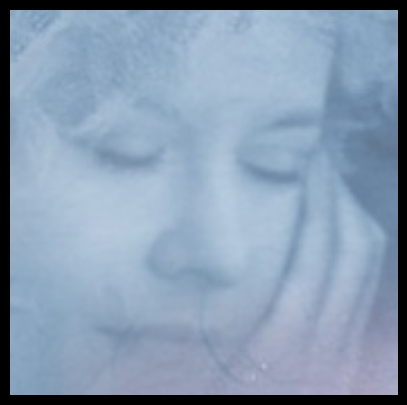

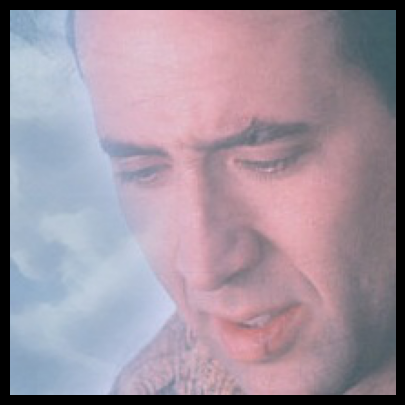

In [26]:
img1 = Image.open("./dataset_B_FacialImages_highResolution/closed_eye_0919.jpg_face_2.jpg")
img2 = Image.open("./dataset_B_FacialImages_highResolution/closed_eye_0919.jpg_face_3.jpg")

plt.figure(figsize=(10, 5))
plt.imshow(img1)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(img2)
plt.axis('off')
plt.show()

앞자리의 번호가 동일해도 뒤의 face_n이 다르면 다른 사람의 얼굴.  

ex) closed_eye_0919.jpg_face_3.jpg와 closed_eye_0919.jpg_face_2는 0919로 번호가 같지만 실제로는 다른 사람의 눈 감은 얼굴을 나타낸 이미지임.

# 2. 라벨 정합성 검정

# 3. 데이터 품질 점검

In [19]:
broken_files = []
size_list = []
for fname in os.listdir("./dataset_B_FacialImages_highResolution/"):
    try:
        img = Image.open("./dataset_B_FacialImages_highResolution/" + fname)
        size_list.append(f'({img.size[0]}, {img.size[1]})')
        img.verify()
    except:
        broken_files.append(fname)
print("깨진 파일:", broken_files)

깨진 파일: []


In [21]:
np.unique(size_list, return_counts=True)

(array(['(100, 100)', '(100, 101)', '(101, 101)', '(101, 102)',
        '(1012, 1013)', '(102, 101)', '(102, 102)', '(102, 103)',
        '(103, 102)', '(103, 103)', '(104, 104)', '(105, 105)',
        '(105, 106)', '(106, 105)', '(106, 107)', '(107, 106)',
        '(107, 107)', '(108, 108)', '(109, 109)', '(109, 110)',
        '(110, 109)', '(110, 110)', '(110, 111)', '(111, 110)',
        '(111, 111)', '(111, 112)', '(112, 111)', '(112, 112)',
        '(113, 113)', '(113, 114)', '(114, 113)', '(114, 114)',
        '(114, 115)', '(115, 114)', '(115, 115)', '(115, 116)',
        '(116, 116)', '(117, 117)', '(118, 118)', '(119, 119)',
        '(119, 120)', '(120, 119)', '(120, 120)', '(120, 121)',
        '(1202, 1203)', '(121, 121)', '(122, 122)', '(122, 123)',
        '(123, 122)', '(123, 123)', '(123, 124)', '(124, 123)',
        '(124, 124)', '(124, 125)', '(125, 125)', '(126, 126)',
        '(126, 127)', '(127, 127)', '(127, 128)', '(128, 127)',
        '(128, 128)', '(128, 129)', 

이미지의 해상도는 균일해보이지는 않음.  대부분 크기가 제각각인 것을 확인 가능

# 라이센스 명시 확인

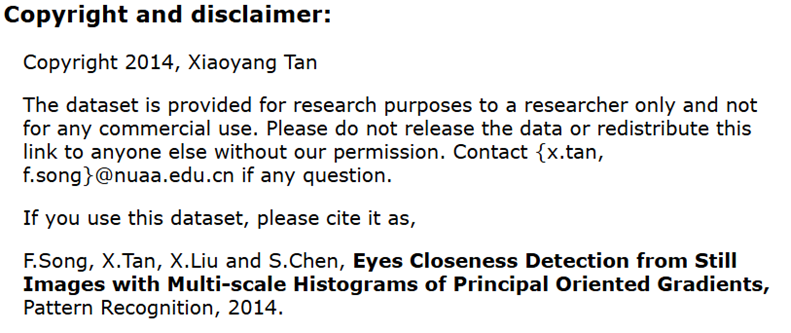

연구 목적으로만 사용할 수 있으며 그 외 상업적 이용시에는 이메일로 컨택해야 할 필요성 있음. 또 데이터셋을 썼으면 레퍼런스 출처를 작성해야 함.